In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
import math
from typing import Optional, List
from sortedcontainers import SortedDict
from Plasma import Plasma_Evolver
from scipy import interpolate
import itertools

[0.         0.15776599 0.29095008]
[0.         0.04893842 0.07441561]
f
Left coordnates: (0.08195573059012205, 0.02740186219077724)
Right coordinates: (0.22743077128010603, 0.06460966550185854)
[0.70904992 0.84223401 0.        ]
[-0.07441561 -0.04893842  0.        ]
f
Left coordnates: (0.7725692287198936, -0.06460966550185851)
Right coordinates: (0.9180442694098774, -0.027401862190777414)
[0.74362613 0.85770686 0.        ]
[-0.15747295 -0.09868056  0.        ]
f
Left coordnates: (0.7971399440752929, -0.13306277427019608)
Right coordinates: (0.9253268801743637, -0.05432630127548995)
[0.         0.13441419 0.26157795]
[0.         0.07185085 0.14769455]
f
Left coordnates: (0.0681133977180495, 0.03542632018175313)
Right coordinates: (0.19890237166765312, 0.10927359605102963)
[0.76710568 0.87322677 0.        ]
[-0.19209696 -0.1123675   0.        ]
f
Left coordnates: (0.8175847052789672, -0.156311984058549)
Right coordinates: (0.9340318664088681, -0.06026350303475174)
[0.         0.1175412  

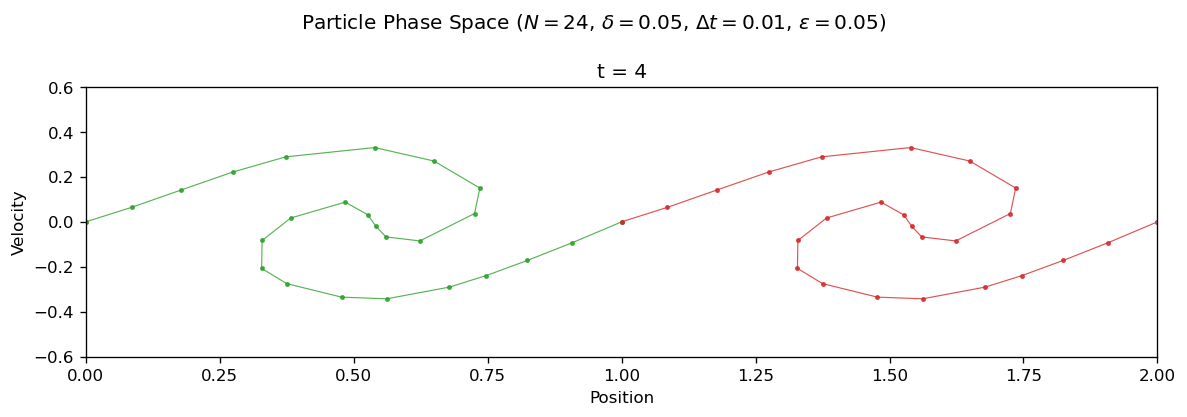

In [86]:
N = 10
dt = 0.01
tmax = 4
driver = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0.05, d1 = 0.3, insertion=True, rk = True)

driver.evolve_plasma(tmax)
driver.plot_particles(times=(tmax,),periods = 2, zoom=False, markers_on=True)


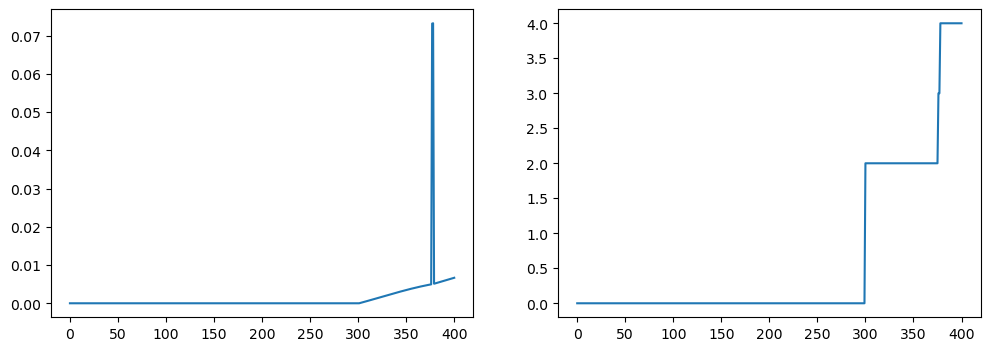

In [85]:
insertions = driver.ins_hist
symmetry = driver.sym_hist

fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].plot(symmetry)
axs[1].plot(np.cumsum(np.array(insertions)))

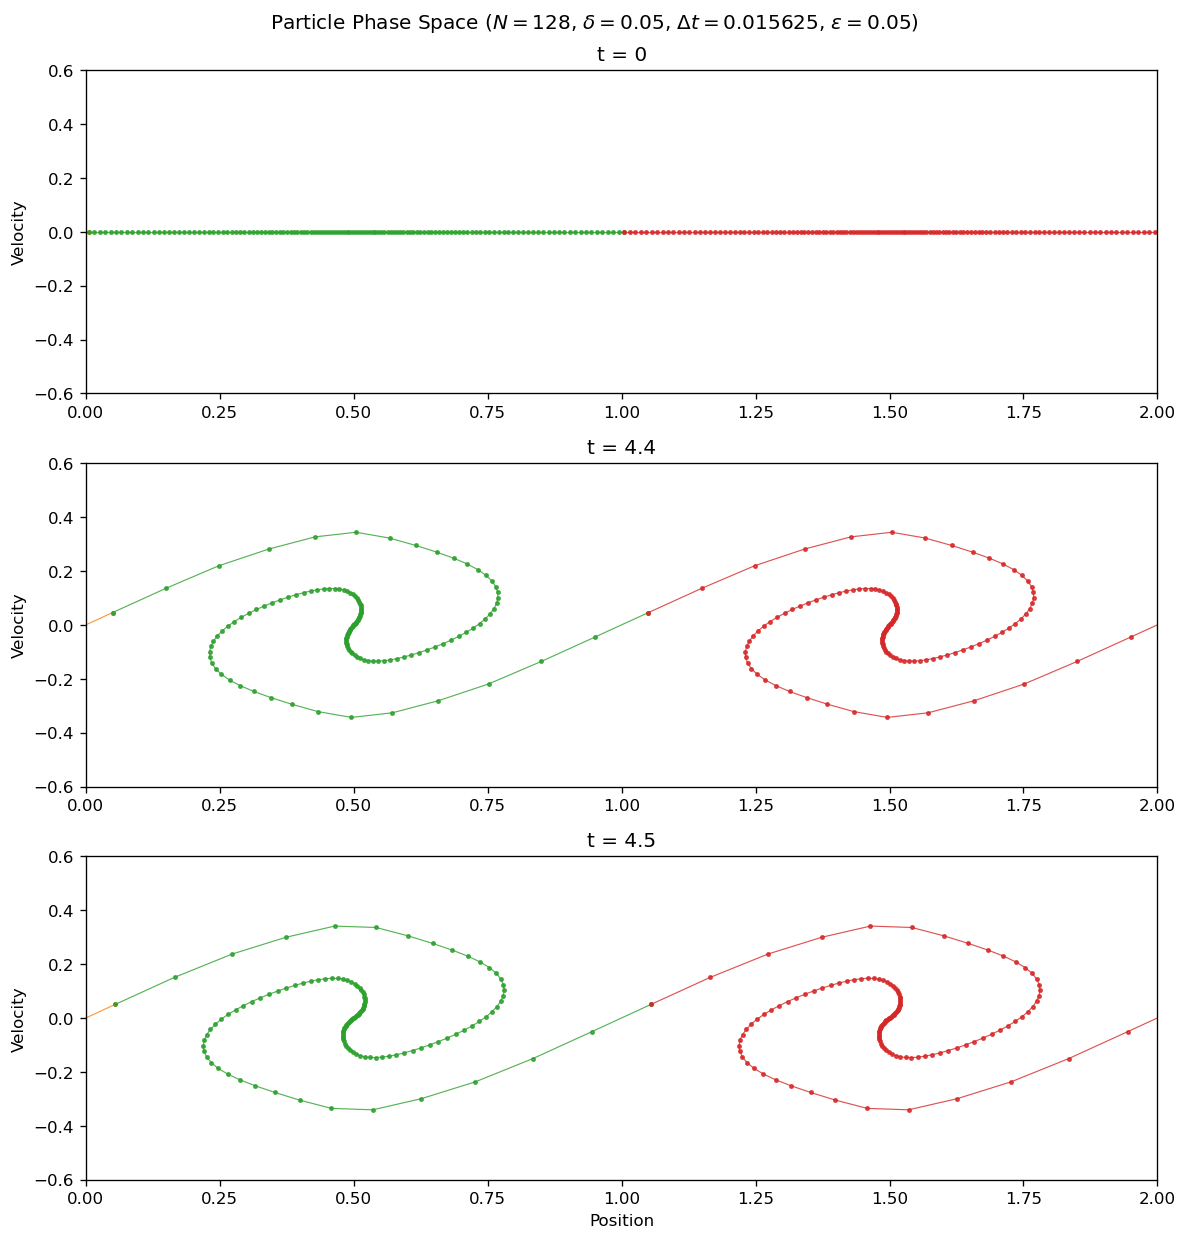

0.047808330447258254

In [54]:

driver.plot_particles(times=(0,4.4,4.5),periods = 2, zoom=False, markers_on=True)
driver.check_symmetry()


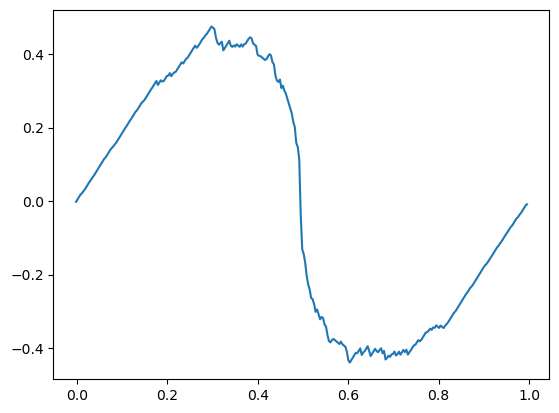

In [18]:
e, x = driver.calc_Efield()

plt.plot(x, e)

In [158]:
alphas1 = [0, 0.1, 0.2]
alphas2 = [0.8, 0.9, 1]

x1 = [0, 0.15776599, 0.29095008]
x2 = [0.70904992, 0.84223401, 1]
v1 = [0, 0.04893842, 0.07441561]
v2 = [-0.07441561, -0.04893842, 0]

int_x1 = interpolate.interp1d(alphas1, x1)
int_x2 = interpolate.interp1d(alphas2, x2)
int_v1 = interpolate.interp1d(alphas1, v1)
int_v2 = interpolate.interp1d(alphas2, v2)

a1_l = 0.5 * (alphas1[0] + alphas1[1]) 
a1_r = 0.5 * (alphas1[1] + alphas1[2]) 

a2_l = 0.5 * (alphas2[0] + alphas2[1]) 
a2_r = 0.5 * (alphas2[1] + alphas2[2]) 

new_x1_l = int_x1(0.05)
new_x1_r = int_x1(0.15)
new_v1_l = int_v1(0.05)
new_v1_r = int_v1(0.15)

new_x2_l = int_x2(0.85)
new_x2_r = int_x2(0.95)
new_v2_l = int_v2(0.85)
new_v2_r = int_v2(0.95)

print("New particle coordinates in left side of interval:")
print("Alpha = {}, ({}, {})".format(0.05, new_x1_l, new_x1_r))
print("Alpha = {}, ({}, {})".format(new_x1_l, new_x1_r))




[0.1, 0.3, 0.5, 0.7, 0.9]


In [15]:
filename = 'data.csv'

def append_pair_to_csv(x, arr):
    # Append the pair to the CSV file
    with open(filename, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([x, arr])

# Usage example
x = 4
arr = np.array([10, 11, 12])
append_pair_to_csv(x, arr)

In [14]:
import csv

filename = 'data.csv'
fieldnames = ['x', 'arr']

# Create a new CSV file with headers
with open(filename, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()